### Group Members

- Bikesh Prajapati	C0859472
- Padam Regmi	C0858265
- Rosy Shrestha	C0857467
- Hemanta Rijal	C0835075
- Shreebatsa Aryal	C0859473

## Lung Cancer Prediction

#### Content
This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels , weight loss , shortness of breath , wheezing , swallowing difficulty , clubbing of finger nails , frequent colds , dry coughs , and snoring

### Import the requried Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import normal_ad, het_breuschpagan
import statsmodels.api as sm
from sklearn.preprocessing import minmax_scale

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("cancer patient data sets.csv")

data.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# checking the datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

### Data preparation

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


#### Checking if there is any missing value

<AxesSubplot:>

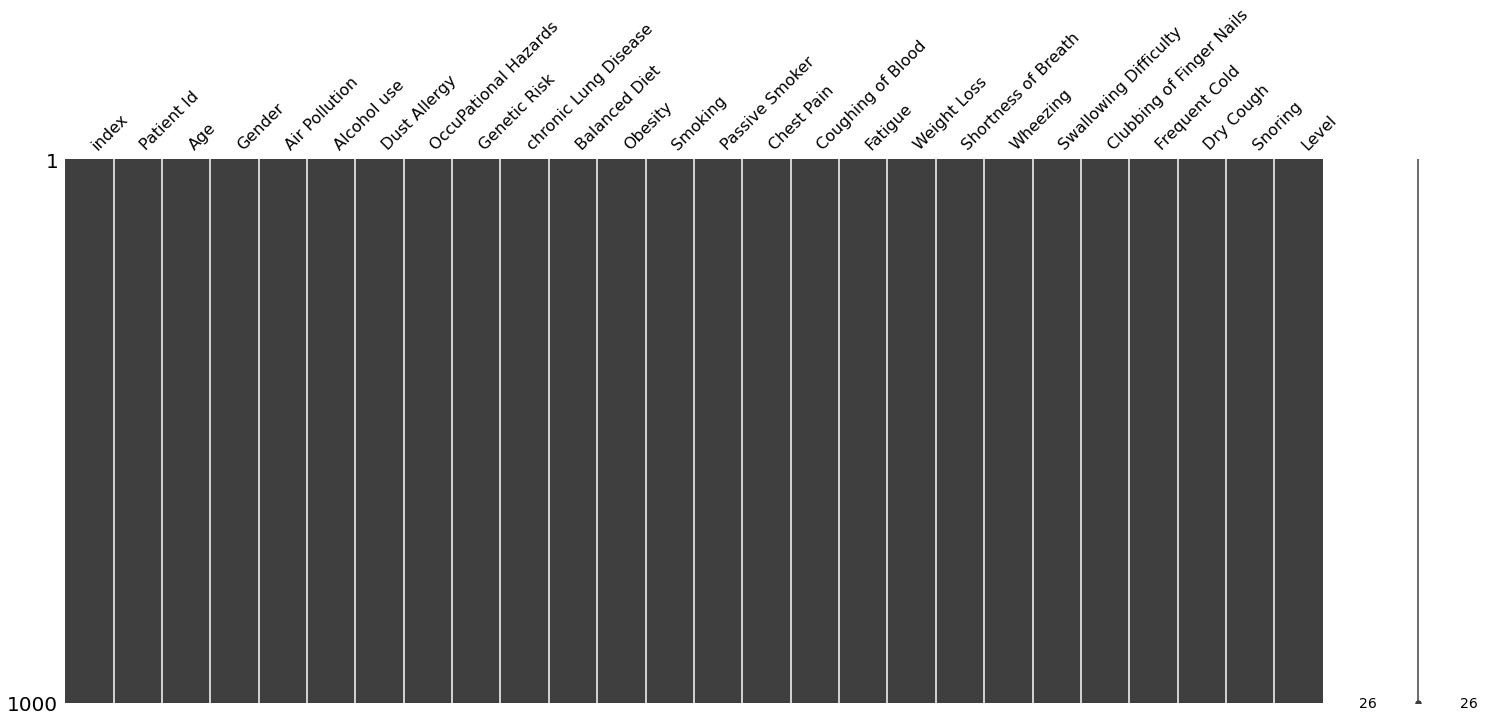

In [5]:
import missingno as msno
msno.matrix(data)

There is no missing value in this dataset

In [6]:
#checking the unique values of level and convert it into numerical values

data['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

#### Dataset Copy

In [7]:
data_copy = data.copy()

#### Covert level into numerical represntative

In [8]:
data_copy['Level'] = data_copy['Level'].map({'Low':0,'Medium':1,'High':2})

In [9]:
data_copy.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


#### Drop user's column

Index and Patient Id does not affect out prediction of lung cancer so we can drop those columns

In [10]:
data_copy = data_copy.drop(['index','Patient Id'], axis = 1)

#### Data Cleaning

In [11]:
def duplicates(df):
    """
    Remove the duplicate rows from dataframe.

    Parameters
    ----------
    df: Pandas dataframe
    
    Returns
    -------
    df: Pandas dataframe without duplicate rows 
    """    
    duplicate_rows_df = df[df.duplicated()]
    if duplicate_rows_df.shape[0] > 0:
       print('Number of rows before removing:', df.count()[0])
       print('Number of duplicate rows:', duplicate_rows_df.shape[0])
       df = df.drop_duplicates()
       print('Number of rows after removing:', df.count()[0])
    else:
       print('No duplicate rows.')
    return df


In [12]:
data_copy = duplicates(data_copy)

Number of rows before removing: 1000
Number of duplicate rows: 848
Number of rows after removing: 152


### Data Visulalization to see correlation

<AxesSubplot:>

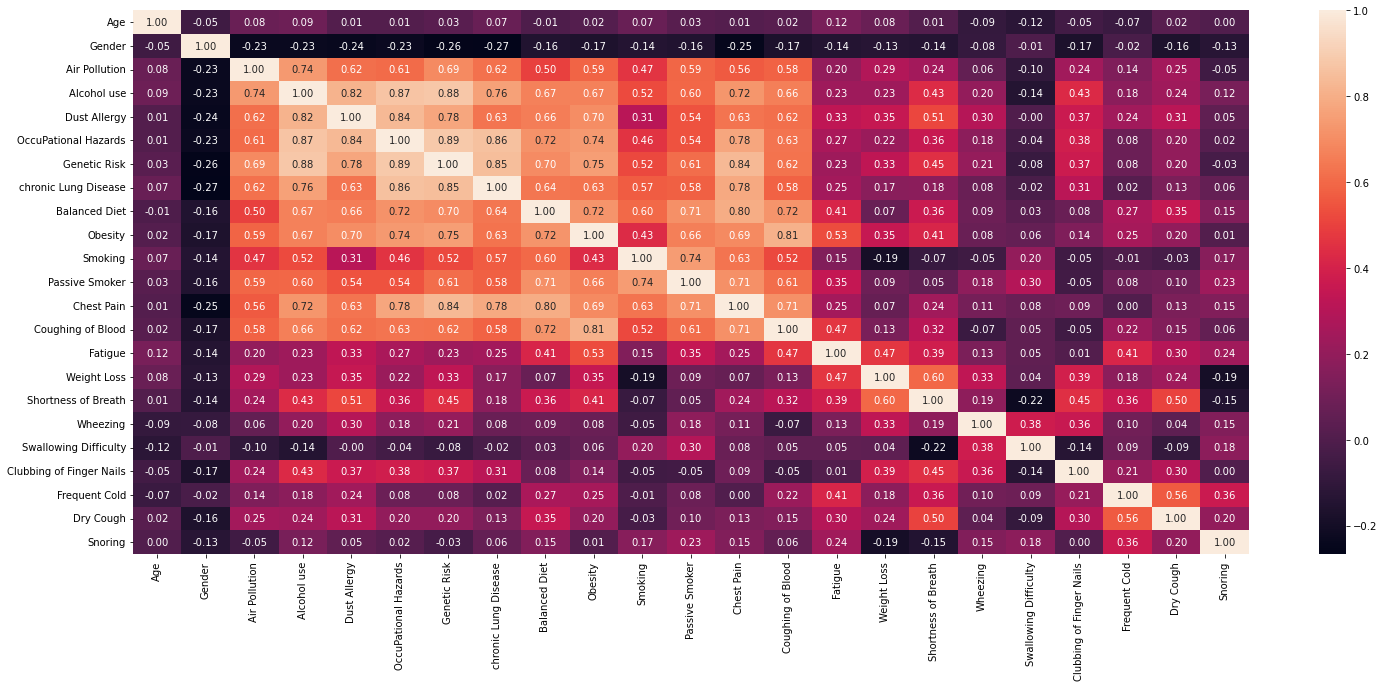

In [13]:
plt.figure(figsize=(25, 10))
sns.heatmap(data_copy.loc[:, data_copy.columns != 'Level'].corr(), annot=True, fmt='.2f')

The target variable 'Level' is highly correlated to following columns:
- Air pollution
- Alcohol use
- Dust Allergy
- Occupational Hazards
- Genetic Risk
- Chronic Lung Disease
- Balance Diet
- Obesity
- Smoking
- Passive Smoker
- Chest Pain
- Coughing of Blood
    

#### checking if there is any outlier 

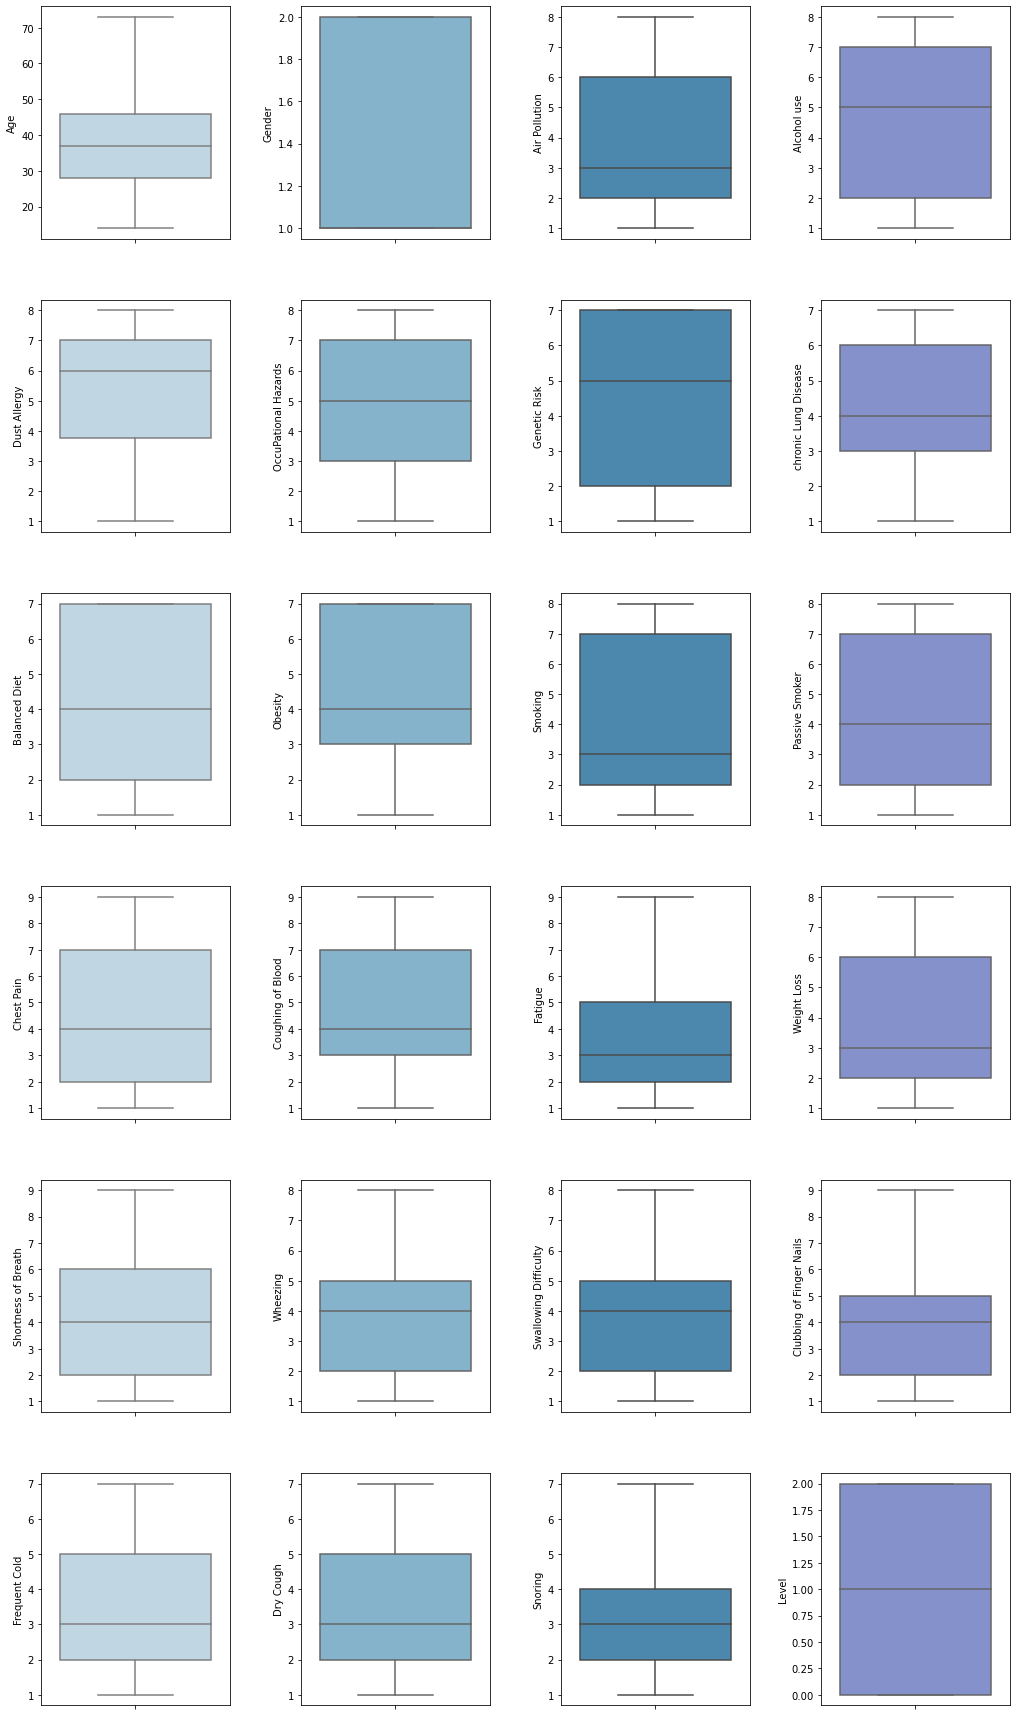

In [14]:
def plotBoxplot(data):
    fig, axes = plt.subplots(ncols=4, nrows=6, figsize=(15,25))
    fig.tight_layout(pad=4.0)

    col = 0
    row = 0
    colors = ['#bad9e9', '#7ab6d6', '#3c8abd','#7a89d6']

    for i, column in enumerate(data.columns):
        sns.boxplot(y=column, data=data, ax=axes[row][col], color=colors[col])

        if (i + 1) % 4 == 0:
            row += 1
            col = 0
        else:
            col += 1
            
plotBoxplot(data_copy)

As we can analyse that only Age has some oultleir in the data set.

#### Analsiing Level with different featuers

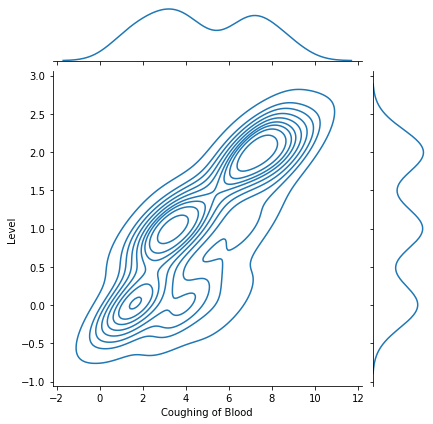

In [15]:
# Coughing of Blood
# higher the level of coughing blood indicate high chance of cancer.
sns.jointplot(data=data_copy, x='Coughing of Blood', y='Level', kind="kde",)
plt.show()

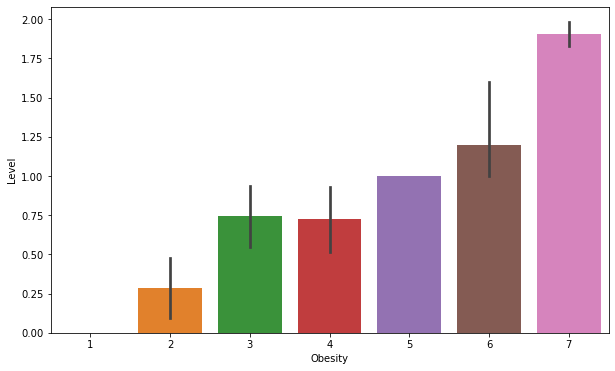

In [16]:
#Here we see that its quite a upward trend in the obestiy as we go higher the obesity we go higher level chance of cancer.
fig = plt.figure(figsize = (10,6))
sns.barplot(data=data_copy, x='Obesity', y='Level')
plt.show()

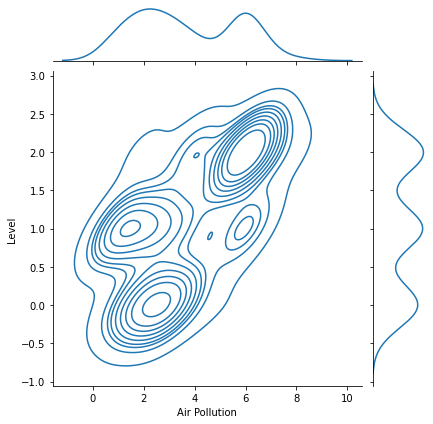

In [17]:
sns.jointplot(data=data_copy, x='Air Pollution', y='Level',kind = 'kde' )
plt.show()

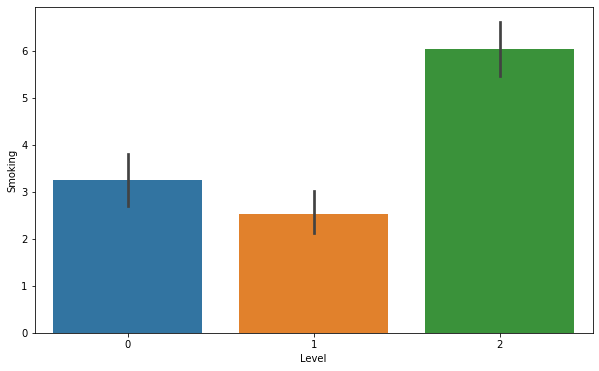

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(data=data_copy, y='Smoking', x='Level')
plt.show()

Here we see that its quite a upward trend in the smoking as we go higher the smoking level we go higher level chance of cancer.


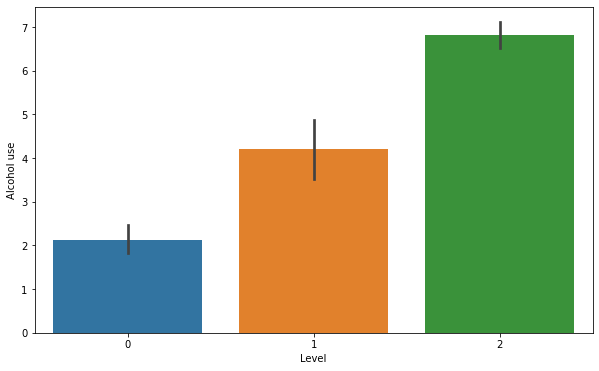

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(data=data_copy, y='Alcohol use', x='Level')
plt.show()

Here we see that its quite a upward trend in the Level as we go higher use of alcochol level we see  higher chance of cancer.


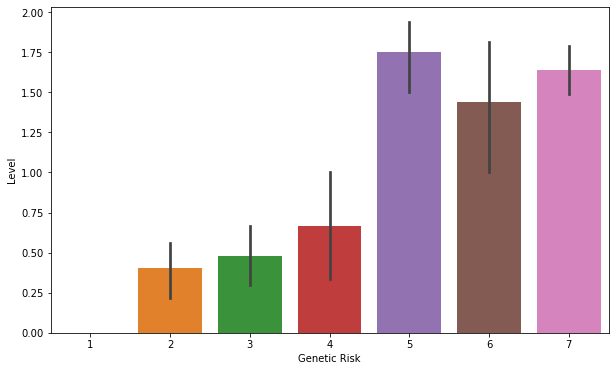

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(data=data_copy, x='Genetic Risk', y='Level')
plt.show()

Here we see that its quite a upward trend in the Level as we see people have genetic risk  we can  see higher chance of people getting cancer.



### Spliting dataFrame in features and targets

In [21]:
#create tmp train/test split for assumptions test
X = data_copy.drop(['Level'], axis=1)
y = data_copy['Level']

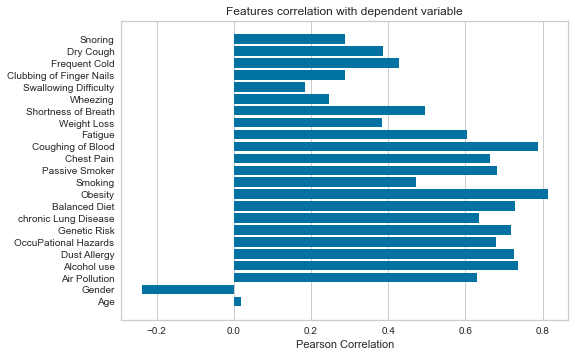

In [22]:
from yellowbrick.target.feature_correlation import feature_correlation

feature_correlation(X, y);

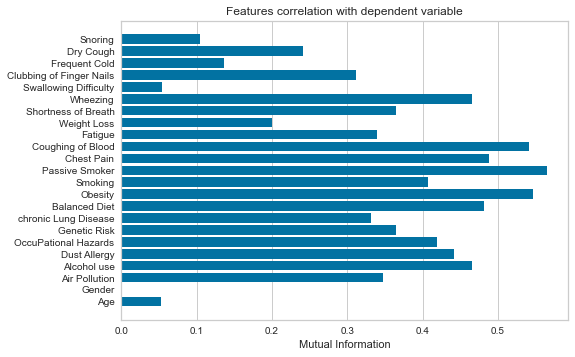

In [23]:
feature_correlation(X, y, method='mutual_info-classification');


### Features importance

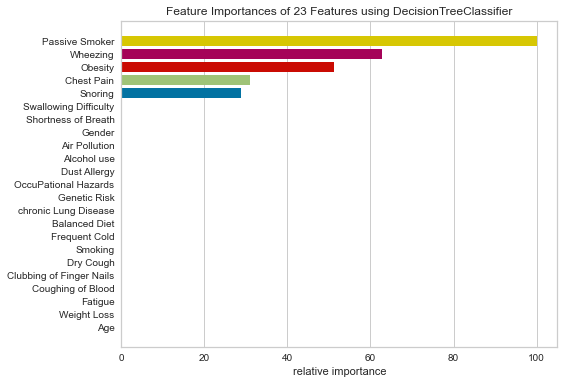

In [24]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import feature_importances

feature_importances(DecisionTreeClassifier(), X, y);

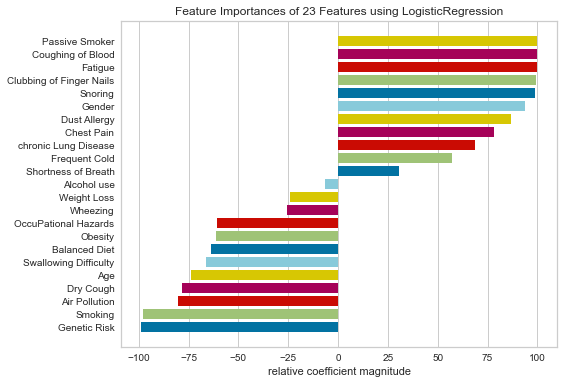

In [25]:
from sklearn.linear_model import LogisticRegression

feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

### PCA Implementaion

In [26]:
# we use standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [27]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)


PCA()

In [28]:
pca.explained_variance_ratio_

array([0.39443955, 0.1187636 , 0.08462439, 0.06827646, 0.05640203,
       0.04799772, 0.03791487, 0.03063632, 0.0265428 , 0.0218407 ,
       0.02158494, 0.01852366, 0.01475467, 0.01199977, 0.01032852,
       0.00996056, 0.00628791, 0.00494126, 0.00450478, 0.00380493,
       0.00338612, 0.00162582, 0.00085862])

Text(0, 0.5, 'Cumulative Explained Variance')

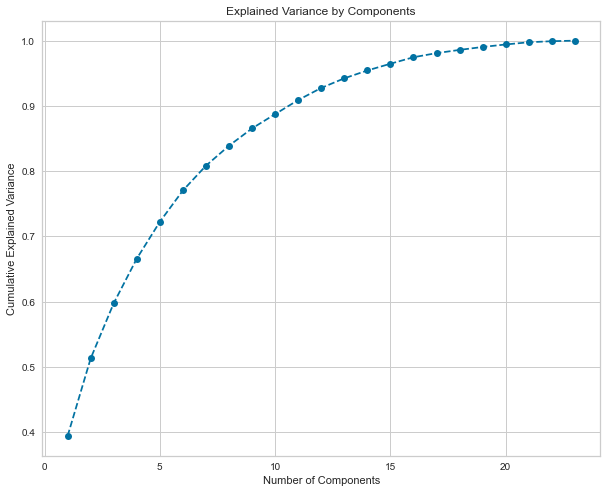

In [29]:
plt.figure(figsize = (10,8))
plt.plot(range(1,24), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

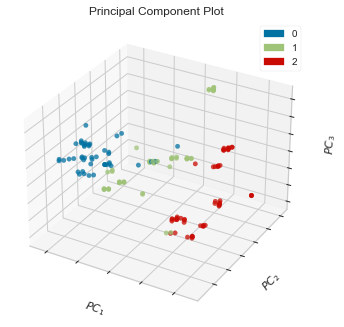

In [30]:
from yellowbrick.features import pca_decomposition
pca_decomposition(X, y.astype(int), projection=3);

### Class Balancing of traget varibale

<AxesSubplot:xlabel='Level', ylabel='count'>

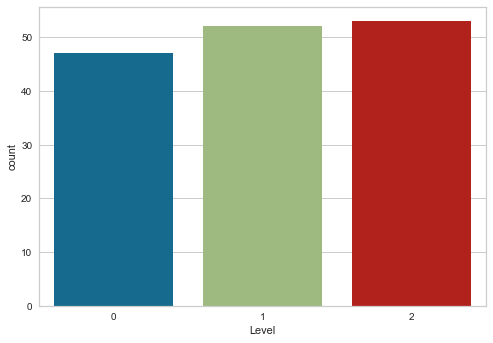

In [31]:
sns.countplot(data_copy['Level'])

### Splitting data in train and test sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=50)

## Build Model

#### Table of models and their scores


In [33]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Train Score", "Test Score", "R2 Score", "Mean Absolute Error", "Mean Squared Error"]

### Model 1: Linear Regression 

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
lr_r2_score = r2_score(y_test, lr.predict(X_test))
lr_mae = mean_absolute_error(y_test, lr.predict(X_test))
lr_mse = mean_squared_error(y_test, lr.predict(X_test))
x.add_row(["Linear Regression", lr_train_score, lr_test_score, lr_r2_score, lr_mae, lr_mse])

print(x)

+-------------------+-------------------+--------------------+--------------------+---------------------+---------------------+
|       Model       |    Train Score    |     Test Score     |      R2 Score      | Mean Absolute Error |  Mean Squared Error |
+-------------------+-------------------+--------------------+--------------------+---------------------+---------------------+
| Linear Regression | 0.931462701459429 | 0.9385477788912998 | 0.9385477788912998 | 0.14334788138584592 | 0.03542615035818927 |
+-------------------+-------------------+--------------------+--------------------+---------------------+---------------------+


### Model 2: Lasso Regression 

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
ls = Lasso(alpha=0.001)
ls.fit(X_train, y_train)
ls_train_score = ls.score(X_train, y_train)
ls_test_score = ls.score(X_test, y_test)
ls_r2_score = r2_score(y_test, ls.predict(X_test))
ls_mae = mean_absolute_error(y_test, ls.predict(X_test))
ls_mse = mean_squared_error(y_test, ls.predict(X_test))
x.add_row(["Lasso Regression", ls_train_score, ls_test_score, ls_r2_score, ls_mae, ls_mse])

print(x)


+-------------------+--------------------+--------------------+--------------------+---------------------+---------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error |  Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+---------------------+
| Linear Regression | 0.931462701459429  | 0.9385477788912998 | 0.9385477788912998 | 0.14334788138584592 | 0.03542615035818927 |
|  Lasso Regression | 0.9311400666223492 | 0.9376395514555417 | 0.9376395514555417 |  0.1442977921880919 | 0.03594972788098848 |
+-------------------+--------------------+--------------------+--------------------+---------------------+---------------------+


### Model 3: Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_train_score = rfr.score(X_train, y_train)
rfr_test_score = rfr.score(X_test, y_test)
rfr_r2_score = r2_score(y_test, rfr.predict(X_test))
rfr_mae = mean_absolute_error(y_test, rfr.predict(X_test))
rfr_mse = mean_squared_error(y_test, rfr.predict(X_test))
x.add_row(["Random Forest Regressor", rfr_train_score, rfr_test_score, rfr_r2_score, rfr_mae, rfr_mse])

print(x)

+-------------------------+--------------------+--------------------+--------------------+---------------------+-----------------------+
|          Model          |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error |   Mean Squared Error  |
+-------------------------+--------------------+--------------------+--------------------+---------------------+-----------------------+
|    Linear Regression    | 0.931462701459429  | 0.9385477788912998 | 0.9385477788912998 | 0.14334788138584592 |  0.03542615035818927  |
|     Lasso Regression    | 0.9311400666223492 | 0.9376395514555417 | 0.9376395514555417 |  0.1442977921880919 |  0.03594972788098848  |
| Random Forest Regressor | 0.9899154451847365 | 0.9871299638989169 | 0.9871299638989169 | 0.04129032258064517 | 0.0074193548387096785 |
+-------------------------+--------------------+--------------------+--------------------+---------------------+-----------------------+


###  Model 4: Gradient Boosting Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_train_score = gbr.score(X_train, y_train)
gbr_test_score = gbr.score(X_test, y_test)
gbr_r2_score = r2_score(y_test, gbr.predict(X_test))
gbr_mae = mean_absolute_error(y_test, gbr.predict(X_test))
gbr_mse = mean_squared_error(y_test, gbr.predict(X_test))
x.add_row(["Gradient Boosting Regressor", gbr_train_score, gbr_test_score, gbr_r2_score, gbr_mae, gbr_mse])

print(x)

+-----------------------------+--------------------+--------------------+--------------------+----------------------+-----------------------+
|            Model            |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error  |   Mean Squared Error  |
+-----------------------------+--------------------+--------------------+--------------------+----------------------+-----------------------+
|      Linear Regression      | 0.931462701459429  | 0.9385477788912998 | 0.9385477788912998 | 0.14334788138584592  |  0.03542615035818927  |
|       Lasso Regression      | 0.9311400666223492 | 0.9376395514555417 | 0.9376395514555417 |  0.1442977921880919  |  0.03594972788098848  |
|   Random Forest Regressor   | 0.9899154451847365 | 0.9871299638989169 | 0.9871299638989169 | 0.04129032258064517  | 0.0074193548387096785 |
| Gradient Boosting Regressor | 0.9999898607888128 | 0.9977365082283937 | 0.9977365082283937 | 0.011120226891467853 | 0.0013048641430488204 |
+-----

### Visualisation of prediction 

In [38]:
model = [lr,ls,gbr,rfr]

In [39]:
def prediction(model,X_test,y_test):
  
        y_pred = model.predict(X_test)
        sns.regplot(y_test, y_pred, line_kws={'color':'red'}, ci=None)

        plt.xlabel('Actual')
        plt.ylabel('Predictions')
        plt.title(f'Model :{model} - Prediction vs Actual')

        plt.show()


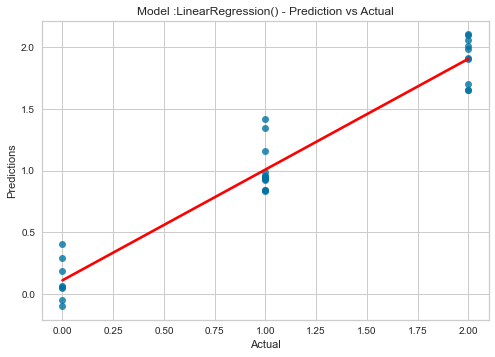

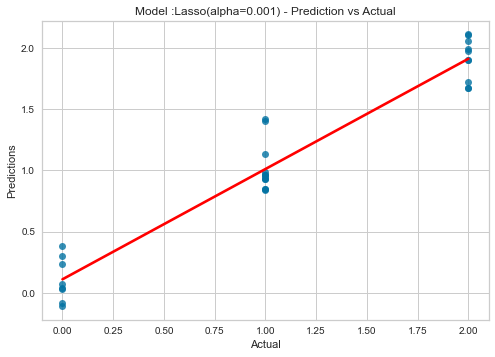

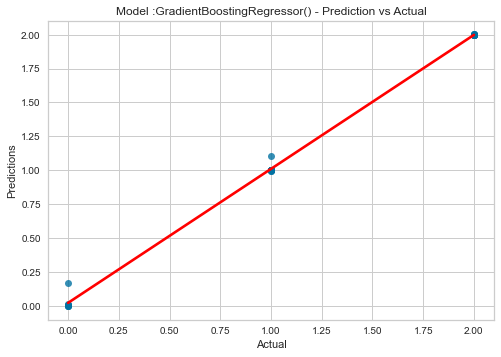

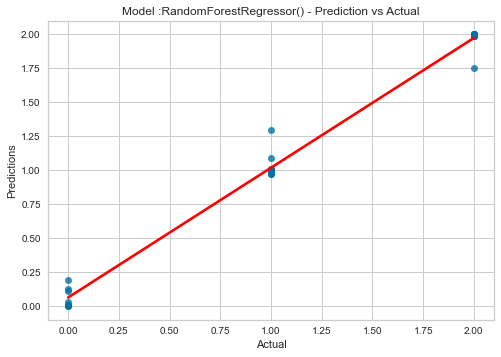

In [40]:
for i in model:
    prediction(i,X_test,y_test)


### Comparission between different models

In [41]:
print(x)

+-----------------------------+--------------------+--------------------+--------------------+----------------------+-----------------------+
|            Model            |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error  |   Mean Squared Error  |
+-----------------------------+--------------------+--------------------+--------------------+----------------------+-----------------------+
|      Linear Regression      | 0.931462701459429  | 0.9385477788912998 | 0.9385477788912998 | 0.14334788138584592  |  0.03542615035818927  |
|       Lasso Regression      | 0.9311400666223492 | 0.9376395514555417 | 0.9376395514555417 |  0.1442977921880919  |  0.03594972788098848  |
|   Random Forest Regressor   | 0.9899154451847365 | 0.9871299638989169 | 0.9871299638989169 | 0.04129032258064517  | 0.0074193548387096785 |
| Gradient Boosting Regressor | 0.9999898607888128 | 0.9977365082283937 | 0.9977365082283937 | 0.011120226891467853 | 0.0013048641430488204 |
+-----

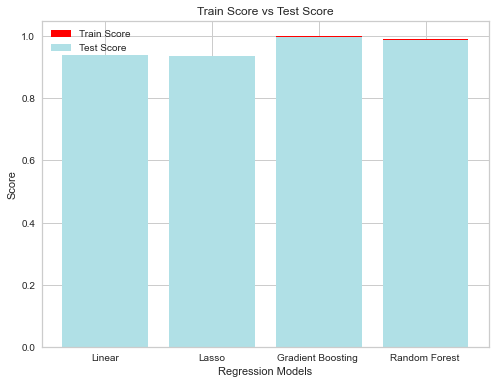

In [42]:
plt.figure(figsize=(8, 6))
plt.bar(x=[ "Linear","Lasso","Gradient Boosting ", "Random Forest "], height=[lr_train_score ,ls_train_score, gbr_train_score, rfr_train_score], color="red", label="Train Score")
plt.bar(x=[ "Linear","Lasso","Gradient Boosting ", "Random Forest "], height=[lr_test_score ,ls_test_score , gbr_test_score, rfr_test_score], color="powderblue", label="Test Score")
plt.legend()
plt.title("Train Score vs Test Score")
plt.xlabel("Regression Models")
plt.ylabel("Score")

plt.show()